![](../images/logos/KIEPSKIES.jpg)

# Model Evaluation Metrics and Validation Techniques
## Introduction to Model Evaluation

- Importance of evaluating machine learning models
- Difference between training accuracy and generalization performance
- Overview of Titanic dataset (classification) and Boston dataset (regression)

### **Importance of Evaluating Machine Learning Models**

Imagine you’ve just built a machine learning model. It runs without errors, predicts outcomes, and you feel like a rockstar! 🎸 But wait—how do you know if it actually works well in the real world?

<span style="color: #00008B;">**1. The Illusion of Accuracy 🤔**</span>

Let’s say you build a model to predict if the Titanic passengers survived (classification task). You check the accuracy, and it says 90%! Sounds amazing, right?

🔴 Problem: If 90% of the passengers didn't survive, a dumb model that predicts "No" for everyone would still be 90% accurate! 😲

💡 Lesson: Accuracy alone does not always reflect true performance. We need better ways to evaluate our models!

<span style="color: #00008B;">**2. Predicting House Prices: Overfitting vs Underfitting 🏠💰**</span>

You train a model on the Boston House Prices dataset (regression task). The model gives almost perfect predictions on the training data! But when tested on new houses, its predictions are way off.

- 🔵 Overfitting: The model memorized training data but can't generalize to new data.
- 🟢 Underfitting: The model is too simple and doesn’t capture patterns well.

💡 Lesson: We need validation techniques to detect and prevent overfitting!

<span style="color: #00008B;">**3. Why Just Splitting Data Isn't Enough? 🔍**</span>

Using just a train-test split means your model is evaluated on a single test set—not robust enough!

- Solution: Use Cross-Validation to evaluate the model on multiple subsets of the data.
- Solution: Use multiple metrics (like Precision, Recall, R² Score) to get a full picture.

<span style="color: #00008B;">**4. The Real-World Impact of Bad Models 😱**</span>4.

Imagine a fraud detection model predicting whether a transaction is fraudulent.

- False Positives: A legit user gets locked out of their account. Frustrating!
- False Negatives: A scammer withdraws thousands of dollars undetected. Huge loss!

💡 Lesson: Confusion Matrices, Precision-Recall, and ROC Curves help analyze model risks.

### **Difference between training accuracy and generalization performance**

Building a machine learning model is like preparing for an exam. Do you want to memorize answers or truly understand the concepts? 🤔

<span style="color: #00008B;">**Training Accuracy:**</span> When the Model is a "Memorization Expert" 🧠

Definition: Training accuracy measures how well the model performs on the same data it was trained on.

- High training accuracy means the model has learned patterns in the training data well.
- **BUT:** It could just be memorizing instead of understanding!

Example: Titanic Dataset

Imagine training a model to predict survival on the Titanic dataset. If training accuracy is 98%, does that mean it's a great model? Not necessarily! It might just be memorizing the training data, not learning meaningful survival patterns.

<span style="color: #00008B;">**Generalization Performance:**</span> Can the Model Handle New Data?

Definition: Generalization performance refers to how well the model makes predictions on unseen data (test/real-world data).

- High generalization performance means the model actually learns useful patterns instead of memorizing.
- Poor generalization means the model struggles with new data, leading to overfitting or underfitting.

<span style="color: #00008B;">**Overfitting vs. Underfitting:**</span> The Two Pitfalls ⚠️

🔴 Overfitting (High training accuracy, low test accuracy)

- The model learns the training data too well (memorization).
- Struggles with new data → Poor generalization.

Example: A house price model learns that houses with "Avenue" in their address are expensive—but this pattern may not hold in new data.

🟢 Underfitting (Low training accuracy, low test accuracy)

- The model is too simple to learn meaningful patterns.
- Poor performance on both training & test data.

Example: A Titanic survival model that only looks at gender but ignores other important features.

<span style="color: #00008B;">**How to Improve Generalization? 🔧**</span>

- Train-Test Split: Always test on unseen data (e.g., 80% train, 20% test).
- Cross-Validation: Use K-Fold Cross-Validation to check performance across multiple splits.
- Regularization: Techniques like L1/L2 regularization prevent overfitting.
- Feature Selection: Remove irrelevant or highly correlated features.
- More Data: More diverse training data helps the model generalize better.



### **Overview of Titanic dataset (classification) and Boston dataset (regression)**
#### Overview of the Titanic Dataset

The Titanic data set will be used for classification task, lets work on the data from importation(loading) to preprocessing. 

In [1]:
# Load all the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_openml  

warnings.filterwarnings("ignore")

# Load Titanic dataset  
titanic = fetch_openml(name='titanic', version=1, as_frame=True)  
df = titanic.frame  

#### Overview of the Boston Dataset
The boston data set will be used for regression task, here we also work on the data from importation(loading) to preprocessing. The data can be download from [here](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data)

In [2]:
# Load the boston data 
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT", "MEDV"
]

boston_df = pd.read_csv('../data/housing.csv', sep = '\s+', names=column_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


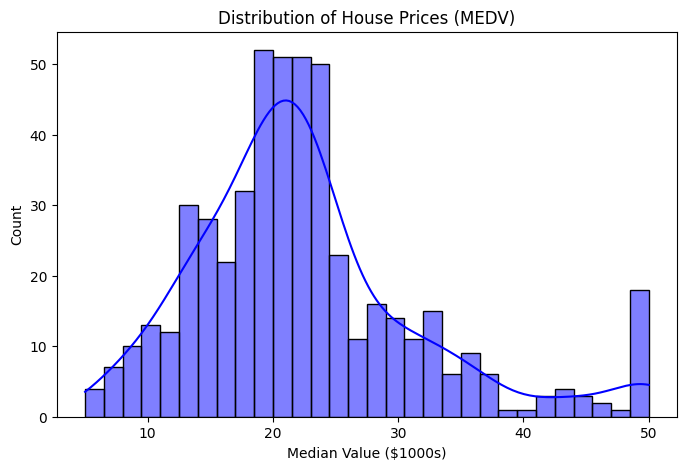

In [3]:
# DATA CLEANING 
boston_df.replace([np.inf, -np.inf], np.nan, inplace=True)
boston_df.dropna(inplace=True)  

# EXPLANATORY DATA ANALYSIS - Data Distribution
plt.figure(figsize=(8,5))
sns.histplot(boston_df['MEDV'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("Median Value ($1000s)")
plt.ylabel("Count")
plt.show()

The Median House prices is evenly distributed with a slight right skew

## Train-Test Split for Basic Validation

- Concept of holdout validation
- Using `train_test_split()` from `sklearn.model_selection`
- Hands-on: Splitting Titanic dataset (classification)
- Hands-on: Splitting Boston House Prices dataset (regression)

<span style="color: #00008B;">**Concept of Holdout Validation**</span>

Holdout validation is a method used to evaluate machine learning models by splitting the available dataset into two separate subsets:

- Training Set: Used to train the model.
- Test Set: Used to evaluate the model’s performance on unseen data.
  
The goal is to estimate how well the model will generalize to new data. Instead of testing on the same data used for training (which can lead to overly optimistic results), holdout validation ensures that the model is assessed on data it has never seen before.

<span style="color: #00008B;">**Using train_test_split() from sklearn.model_selection**</span>

The train_test_split() function from Scikit-Learn is a convenient way to implement holdout validation. It randomly splits the dataset into training and test sets while maintaining the right proportions.

```
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- `X` and `y` represent the features and target variable.
- `test_size=0.2` means 20% of the data is reserved for testing.
- `random_state=42` ensures reproducibility.

<span style="color: #00008B;">**Splitting the Titanic Dataset (Classification Task)**</span>

For classification tasks, such as predicting survival on the Titanic, holdout validation ensures that the model learns patterns rather than memorizing specific passenger records.

Lets get our hands dirty!

In [4]:
from sklearn.model_selection import train_test_split  

# Drop missing values and select relevant features  
df = df.dropna(subset=['survived', 'age', 'fare'])  
X_titanic = df[['age', 'fare']]  # Feature matrix  
y_titanic = np.array(df['survived']).astype(int)       # Target variable  

# Split into training and test sets  
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)  

# Display dataset sizes  
print(f"Training set size: {X_train_titanic.shape[0]}")  
print(f"Test set size: {X_test_titanic.shape[0]}")  

Training set size: 836
Test set size: 209


## Classification Model Evaluation Metrics (Titanic Dataset)

- **Accuracy Score:** When it's useful and when it's misleading
- **Precision, Recall, and F1-score:** When to prioritize precision vs recall
- **Confusion Matrix:** Interpreting TP, FP, TN, FN
- **ROC Curve and AUC Score:** Evaluating model probability outputs
- **Hands-on:** Implementing these metrics using Titanic dataset

Evaluating a classification model is essential to determine how well it performs. Different metrics provide different perspectives, and choosing the right one depends on the problem at hand. Let's explore the key classification evaluation metrics using the Titanic dataset. 

<span style="color: #00008B;">**Accuracy Score:**</span> When It's Useful and When It's Misleading

Accuracy is the simplest metric—it tells us what percentage of predictions were correct.

**Formula:** $$Accuracy = {{\text Correct \space Predictions}\over{\text Total \space Predictions}}$$

**When Accuracy is Useful:**

- When the classes are balanced (roughly equal number of survivors and non-survivors).
- When all types of misclassifications are equally costly.

**When Accuracy is Misleading:**

- **Imbalanced Datasets:** If 90% of passengers did not survive, a model that predicts "No" for everyone would still have 90% accuracy, but it would be useless!
- **When False Positives and False Negatives have different consequences:** In medical diagnosis or fraud detection, a **false negative** (missing a fraud case) might be worse than a **false positive** (flagging a non-fraudulent transaction).

Lets get our hands dirty!

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# Train a model  
model = RandomForestClassifier(random_state=42)  
model.fit(X_train_titanic, y_train_titanic)  

# Make predictions  
y_pred = model.predict(X_test_titanic)  

# Compute accuracy  
accuracy = accuracy_score(y_test_titanic, y_pred)  
print(f"Accuracy Score: {accuracy:.2f}") 

Accuracy Score: 0.60


The model has a poor accuracy score. We will explore how to finetune the model later.

<span style="color: #00008B;">**Precision, Recall, and F1-score:**</span> When to Prioritize Precision vs Recall

**Precision:**

- Measures how many of the predicted positives (survivors) were actually correct.
- **Formula:** $$Precision  = {{\text True \space Positives \space (TP)}\over{\text True \space Positives \space(TP) \space + \space False \space Positives \space(FP)}}$$
- **Useful when False Positives are costly:** E.g., predicting a non-survivor as a survivor when resources (like lifeboats) are limited.

**Recall (Sensitivity):**

- Measures how many of the actual positives (survivors) were correctly predicted.
- **Formula:** $$\text{ F1-score} = {2 \times {{Precision \times Recall}\over{Precision + Recall}}}$$
- This is uUseful when both False Positives and False Negatives are equally important. Lets compute recall, precision and f1-score using python

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score  

# Compute metrics  
precision = precision_score(y_test_titanic, y_pred)  
recall = recall_score(y_test_titanic, y_pred)  
f1 = f1_score(y_test_titanic, y_pred)  

print(f"Precision: {precision:.2f}")  
print(f"Recall: {recall:.2f}")  
print(f"F1-score: {f1:.2f}")  

Precision: 0.53
Recall: 0.45
F1-score: 0.49


<span style="color: #00008B;">**Confusion Matrix:**</span> Interpreting TP, FP, TN, FN

A confusion matrix provides a detailed breakdown of model performance:


|Predicted \ Actual| Survived (1)|	Not Survived (0)|
|:------:|:------:|:-----|
|Survived (1)|TP (True Positives)|FP (False Positives)|
|Not Survived (0)|FN (False Negatives)|TN (True Negatives)|

- *True Positives (TP)*: Correctly predicted survivors.
- *False Positives (FP)*: Incorrectly predicted survivors.
- *False Negatives (FN)*: Survivors predicted as non-survivors.
- *True Negatives (TN)*: Correctly predicted non-survivors.

Lets put this into practice! We will plot a confusion matrix on heatmap.

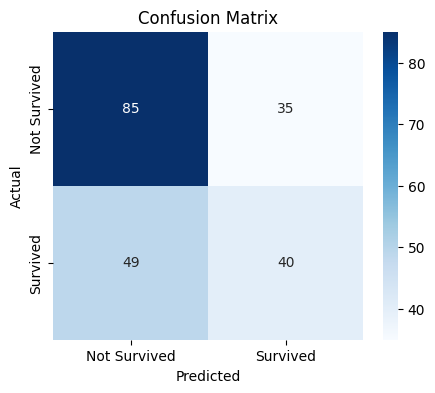

In [7]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Compute confusion matrix  
cm = confusion_matrix(y_test_titanic, y_pred)  

# Plot confusion matrix  
plt.figure(figsize=(5, 4))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])  
plt.xlabel("Predicted")  
plt.ylabel("Actual")  
plt.title("Confusion Matrix")  
plt.show()  

<span style="color: #00008B;">**ROC Curve and AUC Score:**</span>  Evaluating Model Probability Outputs

The ROC (Receiver Operating Characteristic) curve shows how well the model distinguishes between classes at different threshold levels. The AUC (Area Under Curve) score summarizes the ROC curve into a single number.

- ROC Curve: Plots True Positive Rate (TPR) vs. False Positive Rate (FPR).
- AUC Score: Measures how well the model separates classes (higher is better).

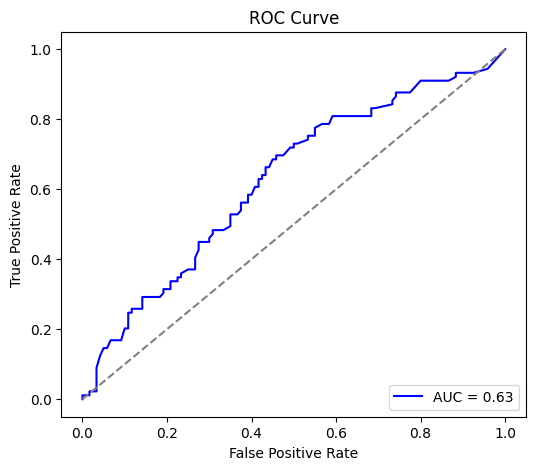

In [8]:
from sklearn.metrics import roc_curve, auc  

# Get predicted probabilities  
y_probs = model.predict_proba(X_test_titanic)[:, 1]  

# Compute ROC curve  
fpr, tpr, _ = roc_curve(y_test_titanic, y_probs)  
roc_auc = auc(fpr, tpr)  

# Plot ROC curve  
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")  
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  
plt.xlabel("False Positive Rate")  
plt.ylabel("True Positive Rate")  
plt.title("ROC Curve")  
plt.legend(loc="lower right")  
plt.show()  


<span style="color: #00008B;">**Final Takeaways**</span>

|Metric|Use Case|
|:------:|:-------:|
|Accuracy| When classes are balanced.|
|Precision| When False Positives are costly (e.g., medical diagnosis, fraud detection).|
|Recall|When False Negatives are costly (e.g., missing survivors in Titanic).|
|F1-score|When both Precision and Recall matter.|
|Confusion Matrix|To analyze prediction errors.|
|ROC & AUC|When evaluating probability-based models.|

Examples of probabilistic models include; Naive Bayes Classifier, Logistic Regression, Bayesian Networks, Gaussian Process Classifier (GPC), Probabilistic Neural Networks (PNNs) and Hidden Markov Models (HMMs) (for Sequential Data such as speech recognition and time series classification).

With these metrics, you can confidently evaluate and improve classification models!

<span style="color: #00008B;">**Splitting the Boston House Prices Dataset (Regression Task)**</span>

For regression tasks, like predicting house prices in Boston, holdout validation helps estimate how well the model generalizes to new properties.

In [9]:
X_boston = boston_df.drop(columns=['MEDV'])  
y_boston = boston_df['MEDV']  

# Split into training and test sets  
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)  
# Display dataset sizes  
print(f"Training set size: {X_train_boston.shape[0]}")  
print(f"Test set size: {X_test_boston.shape[0]}")  

Training set size: 404
Test set size: 102


In [10]:
## Understanding the need for k-fold cross-validation
Implementing Stratified K-Fold (for classification)
Implementing K-Fold Cross-Validation (for regression)
Hands-on: Using cross_val_score() with Titanic and Boston datasets

SyntaxError: invalid syntax (2248658553.py, line 2)

## K-Fold Cross-Validation (For Classification)

In machine learning, evaluating a model's performance on a single train-test split may not be reliable. The performance could be biased based on how the data was split.

Here are the key reasons to use cross-validation; 

- Ensures the model is evaluated on multiple subsets of data.
- Reduces variance in performance estimation.
- Prevents overfitting or underfitting by training on multiple data splits.

How K-Fold Works:

1. The dataset is divided into K equal folds.
2. The model is trained on K-1 folds and tested on the remaining fold.
3. This process is repeated K times, with each fold serving as a test set once.
4. The final performance is the average of all K iterations.

Stratified K-Fold ensures that each fold maintains the same proportion of target class distribution as the original dataset. This is important for imbalanced datasets.

Lets put it in action;

In [ ]:
df.columns

In [ ]:
# LOAD THE TITANIC DATA SET

# Select relevant features
titanic = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
titanic.dropna(inplace=True)  # Remove missing values

# Convert categorical column
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Define features and target
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [ ]:
# APPLY THE STRATIFIED K-FOLD

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Stratified K-Fold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

- Stratified K-Fold ensures each fold maintains the class proportion.
- The mean accuracy provides a reliable estimate of model performance.

Now lets repeat with the Decision Tree Classifier model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
acc_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

print(f"Mean Accuracy: {acc_scores.mean():.4f}")

Random Forest Classifier performs better than the Decision Tree Classifier model

## Regression Model Evaluation Metrics (Boston Dataset)

- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**
- **R-squared (R²) Score:** Interpreting model performance
- Hands-on: Evaluating a regression model using Boston dataset

<span style="color: #00008B;">**Mean Absolute Error (MAE)**</span>

- Measures the average absolute difference between actual and predicted values.
- Gives an intuitive understanding of model performance in the same units as the target variable.

Formula: $$MAE = {1\over n}{\sum{|y_i - \hat y_i|}}$$

Where $\hat y_i$ is the true value and $y_i$   is the predicted value.

MAE is used for cases where all errors are treated equally and is less sensitive to large errors than MSE.

<span style="color: #00008B;">**Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**</span>

- MSE calculates the average of squared differences between actual and predicted values.
- RMSE is simply the square root of MSE.

Formula: $$MSE = {1 \over n}{\sum (\hat y_i - y_i)^2}$$

$$RMSE = \sqrt{MSE}$$

Note that MSE penalizes large errors more than MAE and RMSE provides error measurement in the same unit as the target variable. 

<span style="color: #00008B;">**R-squared (R²) Score**</span>

Represents how well the model explains variance in the target variable.

Formula: $$R^2 = {1 - {{SS_{res}}\over{SS_{tot}}}}$$

where:

- $SS_{res}$ = Sum of squared residuals (errors).
- $SS_{tot}$ = Total sum of squares (variance of actual values).

It is used to compare different models. A value close to 1 indicates a strong model, while a negative value suggests poor performance. Lets train a linear regression model and evaluate it.

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_boston, y_train_boston)

# Make predictions
y_pred = model.predict(X_test_boston)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test_boston, y_pred)
mse = mean_squared_error(y_test_boston, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_boston, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


- Lower MAE, MSE, and RMSE indicate better predictions.
- Higher R² suggests that the model explains most of the variance in house prices.
- Compare these metrics with other models to assess improvement.

You can work on alternative models Decision Trees or Random Forests for better performance. 

## K-Fold Cross-Validation (for Regression)

Unlike Stratified K-Fold, K-Fold is typically used for regression since there are no categorical labels to balance.

Lets put it in action; We will implement the model and evaluate using mean_absolute_error

In [ ]:
from sklearn.model_selection import KFold

# APPLY THE K-FOLD 
# Define K-Fold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = LinearRegression()

# Perform cross-validation
mae_scores = cross_val_score(model, X_boston, y_boston, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -mae_scores

# Print results
print(f"Cross-Validation MAE Scores: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean():.2f}")

- K-Fold is suitable for regression problems.
- The Mean Absolute Error (MAE) provides a measure of model prediction accuracy.

Lets repeat it with another model, Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR

# Initialize SVR model
reg = SVR()

# Perform cross-validation
rmse_scores = np.sqrt(-cross_val_score(reg, X_boston, y_boston, cv=kf, scoring='neg_mean_squared_error'))

print(f"Mean RMSE: {rmse_scores.mean():.2f}")

In [ ]:
# Calculate the MAE for SVR model
# Perform cross-validation
mae_scores = cross_val_score(reg, X_boston, y_boston, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -mae_scores

# Print results
print(f"Cross-Validation MAE Scores: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean():.2f}")

## Hyperparameter Tuning for Model Performance

- **GridSearchCV vs RandomizedSearchCV.**
- Hands-on: Optimizing models using Titanic and Boston datasets